# Can you predict which NBA players will make the "All-Star" team?

## Part 1: Clean the data

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_colwidth = 100
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score,confusion_matrix,ConfusionMatrixDisplay,f1_score,classification_report)

#### Load 'player_data' and explore the basics that you feel are relevant 

In [2]:
playerdf=pd.read_csv('player_data.csv')
# print(playerdf)
# print(playerdf.dtypes)
# print(playerdf.columns)
playerdf.shape
playerdf.head(10)

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,PER,TS%,ORB%,...,3P%,2P%,eFG%,FT%,TRB,AST,STL,BLK,TOV,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,0.368,NaN,...,NaN,0.279,0.279,0.705,NaN,176.0,NaN,NaN,NaN,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,0.435,NaN,...,NaN,0.372,0.372,0.708,NaN,109.0,NaN,NaN,NaN,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,0.394,NaN,...,NaN,0.349,0.349,0.698,NaN,140.0,NaN,NaN,NaN,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,0.312,NaN,...,NaN,0.256,0.256,0.559,NaN,20.0,NaN,NaN,NaN,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,0.308,NaN,...,NaN,0.256,0.256,0.548,NaN,20.0,NaN,NaN,NaN,59.0
5,5,1950.0,Ed Bartels,F,24.0,NYK,2.0,NaN,0.376,NaN,...,NaN,0.250,0.250,0.667,NaN,0.0,NaN,NaN,NaN,4.0
6,6,1950.0,Ralph Beard,G,22.0,INO,60.0,NaN,0.422,NaN,...,NaN,0.363,0.363,0.762,NaN,233.0,NaN,NaN,NaN,895.0
7,7,1950.0,Gene Berce,G-F,23.0,TRI,3.0,NaN,0.275,NaN,...,NaN,0.313,0.313,0.000,NaN,2.0,NaN,NaN,NaN,10.0
8,8,1950.0,Charlie Black,F-C,28.0,TOT,65.0,NaN,0.346,NaN,...,NaN,0.278,0.278,0.651,NaN,163.0,NaN,NaN,NaN,661.0
9,9,1950.0,Charlie Black,F-C,28.0,FTW,36.0,NaN,0.362,NaN,...,NaN,0.287,0.287,0.632,NaN,75.0,NaN,NaN,NaN,382.0


#### Drop the One column that you think will be useless for your use case

In [3]:
playerdf.pop('Unnamed: 0')
# print(playerdf)

0            0
1            1
2            2
3            3
4            4
         ...  
24686    24686
24687    24687
24688    24688
24689    24689
24690    24690
Name: Unnamed: 0, Length: 24691, dtype: int64

#### Replace null values with 0's in the '3P%' column

In [4]:
playerdf['3P%']=playerdf['3P%'].replace(np.nan, 0)
print(playerdf['3P%'])

0        0.000
1        0.000
2        0.000
3        0.000
4        0.000
         ...  
24686    0.000
24687    0.000
24688    0.000
24689    0.333
24690    0.000
Name: 3P%, Length: 24691, dtype: float64


In [5]:
# print(playerdf)

#### Remove rows for players who Started their careers (made their Debut) before the 1980 season

In [6]:
playerdf = playerdf.drop(playerdf[(playerdf.Year < 1980)].index)
data_before_1980=len(playerdf[playerdf['Year']<1980])
if len(playerdf[playerdf['Year']<1980])== 0:
    print("There is no players who Started their careers (made their Debut) before the 1980 season")
else:
    print(f"There are {data_before_1980} players who Started their careers (made their Debut) before the 1980 season")

There is no players who Started their careers (made their Debut) before the 1980 season


Removing all rows from all columns where the year is blanks

In [7]:
playerdf.dropna(subset=['Year'], inplace=True)
playerdf=playerdf.reset_index(drop=True)
print(playerdf)

         Year                Player Pos   Age   Tm     G   PER    TS%  ORB%  \
0      1980.0  Kareem Abdul-Jabbar*   C  32.0  LAL  82.0  25.3  0.639   7.2   
1      1980.0         Tom Abernethy  PF  25.0  GSW  67.0  11.0  0.511   5.4   
2      1980.0           Alvan Adams   C  25.0  PHO  75.0  19.2  0.571   8.2   
3      1980.0       Tiny Archibald*  PG  31.0  BOS  80.0  15.3  0.574   2.3   
4      1980.0         Dennis Awtrey   C  31.0  CHI  26.0   7.4  0.524   6.0   
...       ...                   ...  ..   ...  ...   ...   ...    ...   ...   
18922  2017.0           Cody Zeller  PF  24.0  CHO  62.0  16.7  0.604   8.6   
18923  2017.0          Tyler Zeller   C  27.0  BOS  51.0  13.0  0.508   9.2   
18924  2017.0     Stephen Zimmerman   C  20.0  ORL  19.0   7.3  0.346  10.8   
18925  2017.0           Paul Zipser  SF  22.0  CHI  44.0   6.9  0.503   1.9   
18926  2017.0           Ivica Zubac   C  19.0  LAL  38.0  17.0  0.547   7.1   

       DRB%  ...    3P%    2P%   eFG%    FT%    TRB

#### Load in the 'all_star_appearances.pickle' file and use this data to create a column called 'all_star' that indicates whether or not a player made the All-Star team for a given year
- This file is a dictionary in which the keys are players who've made an All-Star team in their careers
- The values are all the years that the corresponding player made an All-Star team

#### Make sure this column is binary where 1 = Made All-Star team, and 0 = Did not make All-Star team

In [8]:
# creating necessary variable to store append and manipulate data
db = {}
unique_years=[]
obj=[]
dbfile = open('all_star_appearances.pickle', 'rb')# opening a pickle file
db = pickle.load(dbfile)# loading file as defaultdict

In [9]:
# Seprating the years from all the years in which player made to all star to get all the unique years
for keys in db:
    for unique_year in db[keys]:
        unique_years.append(unique_year)
unique_years = set(list(dict.fromkeys(unique_years)))# To get the uniue set of years from the file

In [10]:
# Comparing the year as x with unique_year to identify if the player referenced as keys are in all_star for that particular year
#if it yes than 1 else 0. Once it done the data gets append to dataframe df
for keys in db:
    for year in unique_years:
        if year in db[keys]:
            Pickledf=(keys,year,1)
            obj.append(Pickledf)

        else:
            Pickledf=(keys,year,0)
            obj.append(Pickledf)

In [11]:
header=['Players','Years','All_star'] # defining headers of the dataframe
Pickledf=pd.DataFrame(obj,columns=header,index=None) #converting list to dataframe
Player = str(input(f"Please Enter player name from ::{Pickledf['Players'].unique()}:")) #taking user input for player
if Player in Pickledf['Players'].unique(): #Checks for the player name if not in the list than entered name is incorrect
    Year = int(input(f"Please Enter Years from {Pickledf['Years'].unique()}:"))#taking user input for the year which must be int
    if Year in Pickledf['Years'].unique():#checks for the year if not in the list shows entered year is incorrect
        result=Pickledf.query(f"Players=='{Player}' & Years=={Year}")["All_star"] # if the player name and year matches it shows corresponding value of all_star
        if result.values==1: #if the result value which is now in numpy array is 1 than he made it to all_star else not
            print(f"The Player '{Player}' is made to All-Star team in the year '{Year}' ")
        else:
            print(f"The Player '{Player}' has not made to All-Star team in the year'{Year}' ")
    else:
        print(f"There is no player name in the year {Year}")

else:
    print(f"There is no player name like {Player}")

# created a new pickle file to store the processed data
picklefile = open('all_star_appearances_processed.pickle', 'wb+')# if you want to write on existing file change name to pickle
pickle.dump(Pickledf, picklefile)# dumping the data from dataframe obj to picklefile
picklefile.close()# closing the file

Please Enter player name from ::['Julius Erving' 'Jack Sikma' 'Dan Roundfield' 'Dennis Johnson'
 'Tiny Archibald' 'Kareem Abdul-Jabbar' 'Eddie Johnson' 'Otis Birdsong'
 'Magic Johnson' 'Kermit Washington' 'Bill Cartwright' 'John Drew'
 'Walter Davis' 'Moses Malone' 'Micheal Ray Richardson' 'Adrian Dantley'
 'Scott Wedman' 'Paul Westphal' 'Marques Johnson' 'Elvin Hayes'
 'Larry Bird' 'World B. Free' 'Dave Cowens' 'George Gervin'
 'Jamaal Wilkes' 'Bobby Jones' 'Mike Mitchell' 'Reggie Theus'
 'Artis Gilmore' 'Robert Parish' 'Truck Robinson' 'Gus Williams'
 'Buck Williams' 'Lonnie Shelton' 'Bob Lanier' 'Norm Nixon' 'Bernard King'
 'Isiah Thomas' 'Alex English' 'Sidney Moncrief' 'Kelly Tripucka'
 'David Thompson' 'Andrew Toney' 'Bill Laimbeer' 'Kiki Vandeweghe'
 'Jim Paxson' 'Maurice Lucas' 'Maurice Cheeks' 'Mark Aguirre'
 'Rickey Green' 'Kevin McHale' 'Jeff Ruland' 'Ralph Sampson'
 'Hakeem Olajuwon' 'Terry Cummings' 'Calvin Natt' 'Larry Nance'
 'Michael Jordan' 'Rolando Blackman' 'Jeff Mal

The Player 'Chris Kaman' has not made to All-Star team in the year'2003' 


In [12]:
dbfile = open('all_star_appearances_processed.pickle', 'rb')
db = pickle.load(dbfile)
db.head(10)

,Players,Years,All_star
0,Julius Erving,1980,1
1,Julius Erving,1981,1
2,Julius Erving,1982,1
3,Julius Erving,1983,1
4,Julius Erving,1984,1
5,Julius Erving,1985,1
6,Julius Erving,1986,1
7,Julius Erving,1987,1
8,Julius Erving,1988,0
9,Julius Erving,1989,0


## Part 2: Exploratory data analysis

#### Generate descriptive stats for the features

In [13]:
len(playerdf['Player'].unique())

2835

In [14]:
playerdf=playerdf.loc[:, playerdf.columns != 'Year']
playerdf.describe()

,Age,G,PER,TS%,ORB%,DRB%,TRB%,AST%,STL%,BLK%,...,3P%,2P%,eFG%,FT%,TRB,AST,STL,BLK,TOV,PTS
count,18927.000000,18927.000000,18922.000000,18851.000000,18922.000000,18922.000000,18922.000000,18922.000000,18922.000000,18922.000000,...,18927.000000,18810.000000,18839.000000,18182.000000,18927.000000,18927.000000,18927.000000,18927.000000,18927.000000,18927.000000
mean,26.838326,49.639510,12.395714,0.503862,6.153715,13.741587,9.948827,13.098023,1.649894,1.451533,...,0.202644,0.457184,0.464085,0.721709,203.935066,110.585513,38.771332,24.171818,72.570613,486.034184
std,3.999546,26.693379,6.200326,0.094507,4.957866,6.607566,5.063935,9.569159,1.027371,1.821756,...,0.186491,0.100017,0.098349,0.147018,202.431683,137.328298,37.829930,36.471577,66.602288,479.419028
min,18.000000,1.000000,-90.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,26.000000,9.700000,0.473000,2.500000,8.900000,6.000000,6.300000,1.100000,0.400000,...,0.000000,0.423000,0.433000,0.660000,46.000000,17.000000,9.000000,3.000000,17.000000,94.000000
50%,26.000000,55.000000,12.700000,0.516000,5.300000,12.800000,9.200000,10.400000,1.500000,0.900000,...,0.235000,0.467000,0.475000,0.750000,145.000000,61.000000,28.000000,11.000000,54.000000,338.000000
75%,30.000000,75.000000,15.600000,0.551000,9.000000,18.100000,13.400000,17.900000,2.100000,2.000000,...,0.348000,0.503000,0.510000,0.813000,295.000000,151.000000,58.000000,29.000000,110.000000,750.000000
max,44.000000,85.000000,129.100000,1.136000,100.000000,100.000000,100.000000,100.000000,24.200000,77.800000,...,1.000000,1.000000,1.500000,1.000000,1530.000000,1164.000000,301.000000,456.000000,464.000000,3041.000000


#### Graph the distibution of the 'Age' feature. What conclusion can you reach from this?

<Axes: xlabel='Age', ylabel='Count'>

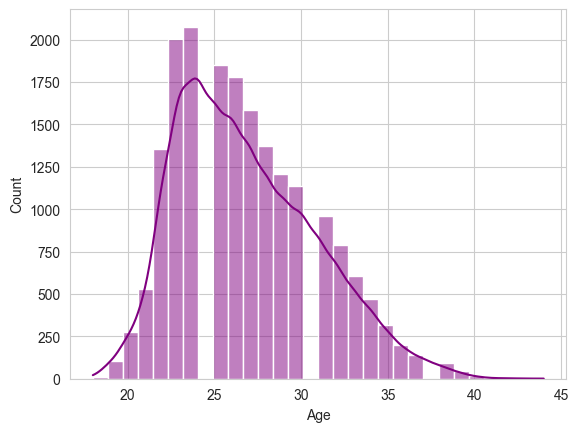

In [15]:
# set the background style of the plot
sns.set_style('whitegrid')
sns.histplot(playerdf['Age'], kde = True, color ='purple', bins = 30)

Ans:Most of the player are in Age between of 22-31 while age 24 has maximum no of players

#### Create a correlation map of the features

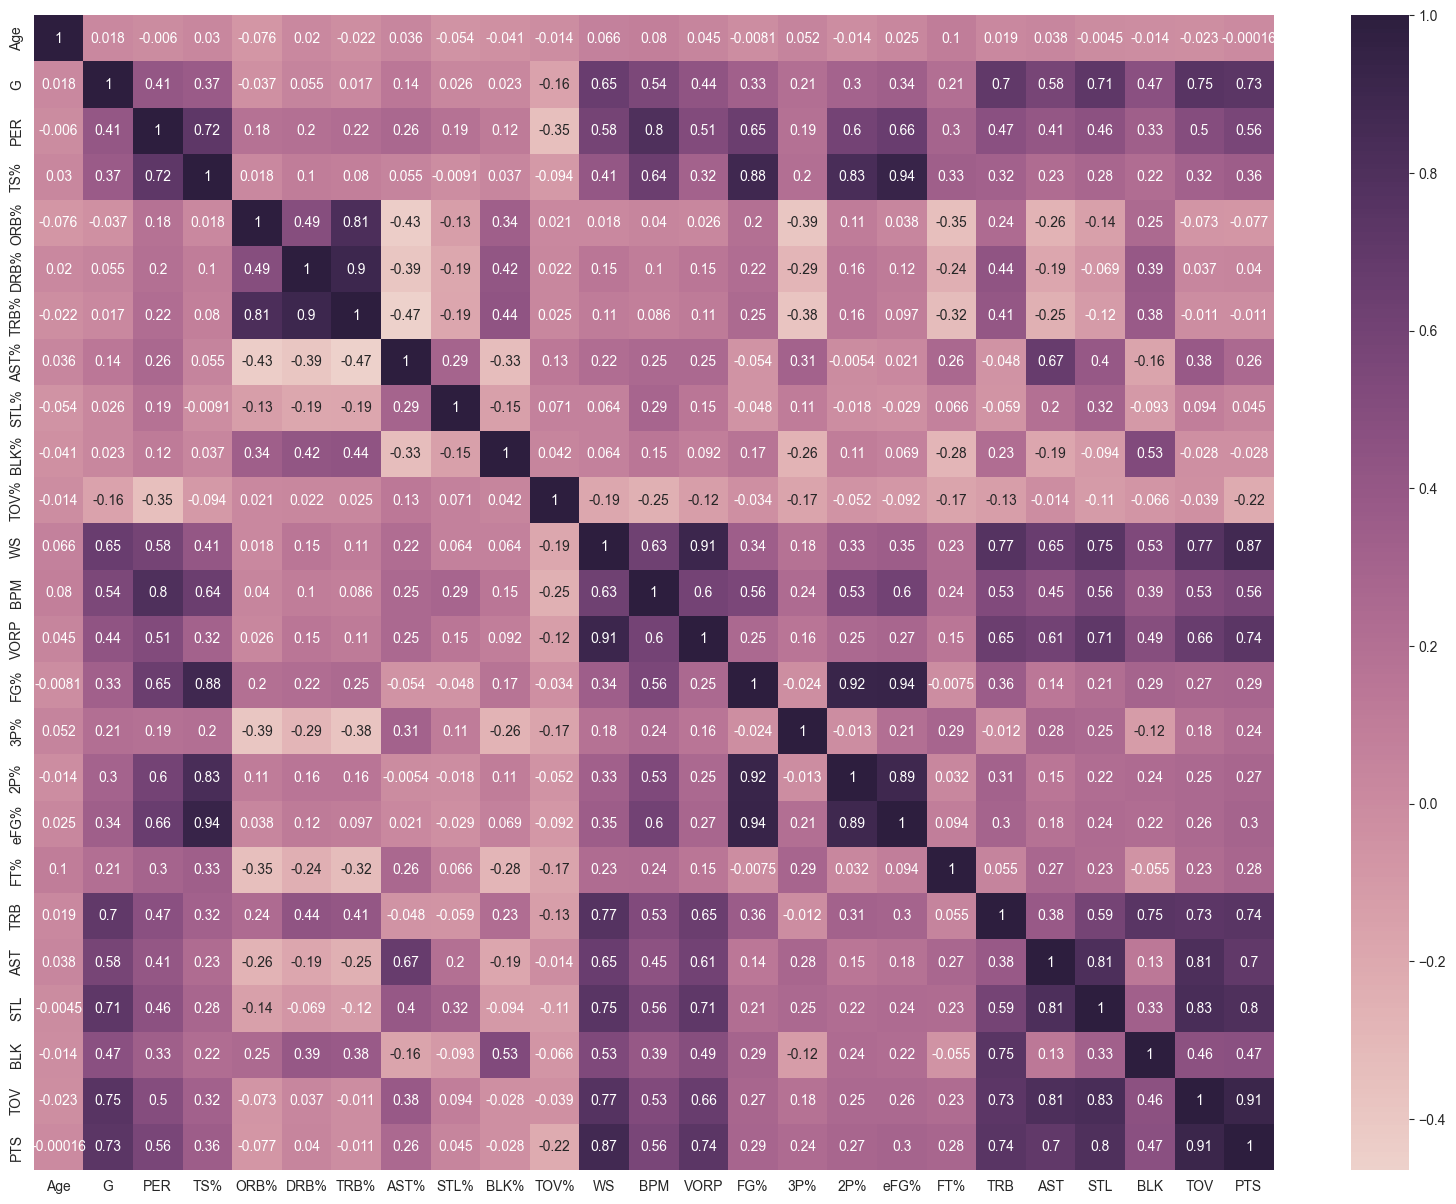

In [16]:
playerdf=playerdf.loc[:,~playerdf.columns.isin(['Year', 'Player','Pos','Tm'])]
plt.subplots(figsize=(20,15))
dataplot = sns.heatmap(playerdf.corr(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True)

#### Remove Features that you consider to be too correlated or "duplicated"

In [17]:
playerdf = pd.read_csv("player_data.csv")
playerdf.pop('Unnamed: 0')

0            0
1            1
2            2
3            3
4            4
         ...  
24686    24686
24687    24687
24688    24688
24689    24689
24690    24690
Name: Unnamed: 0, Length: 24691, dtype: int64

In [18]:
# Removing constant or Duplicate features.We can find the constant features using the ‘VarianceThreshold’
# function of Python’s Scikit Learn Library.In return it helps with overfitting
x = playerdf.drop(['Year', 'Player','Pos','Tm'], axis = 1)
y = playerdf['Year']
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.001, random_state=45)
print(trainX)
constant_filter = VarianceThreshold(threshold=0)# VarianceThreshold function to remove constant features.
constant_filter.fit(trainX)# applying this filter to our training set
print(f"get all the features that are not constant\n{len(trainX.columns[constant_filter.get_support()])}")# we get all the features that are not constant
#find the number of constant features
constant_columns = [column for column in trainX.columns if column not in trainX.columns[constant_filter.get_support()]]
print(f"find the number of constant features\n{len(constant_columns)}")
# removed variables from the training and test part
constant_columns_to_remove = [i.strip() for i in constant_columns]
trainX = trainX.drop(constant_columns_to_remove, axis=1)
print(f"removed variables from the training\n{trainX}")
testX = testX.drop(constant_columns_to_remove, axis=1)
print(f"removed variables from the test\n{testX}")
# Removing Duplicate Features
trainX_T = trainX.T
print(f"Removing Duplicate Features\n{trainX_T}")
# here we get the number of duplicate features
print(f"We get the number of duplicate features{trainX_T.duplicated().sum()}")
#receive the number of features we will keep for further analysis
unique_features = trainX_T.drop_duplicates(keep='first').T
print(unique_features)
# Define of list of Duplicate features we need to remove
duplicated_features = [dup_col for dup_col in testX.columns if dup_col not in unique_features.columns]
print(f"Define of list of Duplicate features we need to remove\n{duplicated_features}")
trainX = trainX.drop(duplicated_features, axis=1)
print(f"Define of list of Duplicate features we need to remove in train\n{trainX}")
testX = testX.drop(duplicated_features, axis=1)
print(f"Define of list of Duplicate features we need to remove in test\n{testX}")

        Age     G   PER    TS%  ORB%  DRB%  TRB%  AST%  STL%  BLK%  ...  \
9031   25.0  41.0   8.3  0.558   9.3  13.3  11.3   3.1   0.9   0.4  ...   
2180   28.0  77.0  13.5  0.484   NaN   NaN   NaN  13.0   NaN   NaN  ...   
336    25.0  46.0   NaN  0.426   NaN   NaN   NaN   NaN   NaN   NaN  ...   
18005  30.0  47.0   8.6  0.509   9.0  18.1  13.5   6.8   0.6   2.0  ...   
1012   22.0  20.0  11.2  0.396   NaN   NaN   NaN   NaN   NaN   NaN  ...   
...     ...   ...   ...    ...   ...   ...   ...   ...   ...   ...  ...   
16317  26.0  48.0  14.8  0.590   9.0  13.3  11.1   6.2   1.9   1.5  ...   
12895  28.0  21.0  11.3  0.455   1.6   9.6   5.3  19.6   3.0   1.0  ...   
6012   26.0  81.0  19.7  0.551  12.1  22.7  17.3  11.3   1.9   3.2  ...   
6558   32.0  82.0  22.4  0.702   9.5  23.7  16.9   7.5   0.8   4.3  ...   
23499  24.0  37.0  17.6  0.570  10.1  17.9  14.0   6.4   0.8   5.3  ...   

         3P%    2P%   eFG%    FT%    TRB    AST    STL    BLK    TOV     PTS  
9031   0.000  0.541 

## Part 3: Modeling

#### Build a simple classifier that predicts whether or not a player makes an All-Star team based on their stats for that season.

,Years,All_star,Players_Adrian Dantley,Players_Al Horford,Players_Alex English,Players_Allan Houston,Players_Allen Iverson,Players_Alonzo Mourning,Players_Alvin Robertson,Players_Amar'e Stoudemire,...,Players_Vin Baker,Players_Vince Carter,Players_Vlade Divac,Players_Wally Szczerbiak,Players_Walter Davis,Players_World B. Free,Players_Xavier McDaniel,Players_Yao Ming,Players_Zach Randolph,Players_Zydrunas Ilgauskas
0,1980,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1981,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1982,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1983,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1984,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


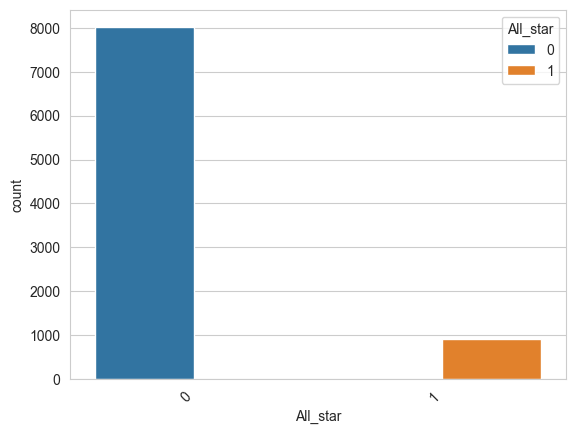

In [19]:
sns.countplot(data=Pickledf,x='All_star',hue='All_star')
plt.xticks(rotation=45, ha='right');
pre_df = pd.get_dummies(Pickledf,columns=['Players'],drop_first=True)
pre_df.head()

Accuracy: 0.2432810750279955
F1 Score: 0.20593451956360975


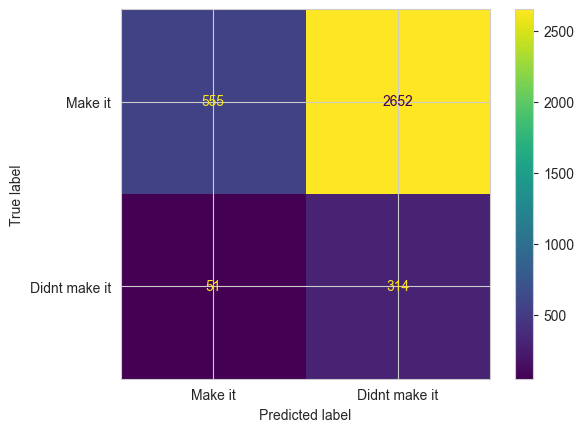

In [20]:
X = pre_df.drop('All_star', axis=1)
y = pre_df['All_star']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")
print("Accuracy:", accuray)
print("F1 Score:", f1)
labels = ["Make it", "Didnt make it"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

## Part 4: Data Engineering

#### Imagine that we are in 2017 and we collect this data from each of the 31 teams that play on the NBA. Each one of the teams exposes a REST API endpoint for us to extract the data and process it, this means that we have to do 31 different GET requests on each update. We are building a Web Application for ESPN and they need this data to be updated on daily basis, so when sports analysts start working in the morning they have fresh stats to go over and can give informed predictions in TV about which players will be making the All-Star team. We have an approximate of 12 users that will be using the product on daily basis.

#### At the end of each season, we will update the Pickle file (which is stored in a Bucket in Cloud Object Storage) to include the players that were included in the All-Star team and keep the dataset and model updated. All the development will be done in Python, and the architecture of the ETL process will be defined by you, along with the Cloud Service Provider (you can choose between AWS, GCP, Azure). Don't worry about the Backend and Frontend of the App, that will be defined and implemented by the Development team, but they are waiting on your decision on which database to use.

#### Would you use a dedicated server or a serverless architecture? Why?

I will use serverless architecture. Mainly for below reason:
1. Hassle-free work
2. No maintainence required from our end
3. Can be auto-scaled
4. Only charges for compute
5. No to less downtime

#### What Computing resources would you use? Why?

I will mostly used AWS Lambda service.Mainly for below reason:
1. Lambda is a serverless computing service that automatically scales in response to incoming requests.
2. Lambda functions can be triggered by API Gateway, making them suitable for REST APIs.3.  You only pay for the compute time use.

#### What type of storage would you choose? How would you guarantee data quality and consistency?

I will use Amazon RDS or Amazon Dynamo Db Depending on our data storage needs, choosing RDS for relational databases or DynamoDB for NoSQL databases to complement our REST API services

#### What Security considerations would you implement for these architecture?

Features like authentication, authorization and role based control needs to be implemeted to the architecture

#### What type of monitoring, costs analysis and application performance should this architecture have?

We will monitor the resources we used like Lambda,API Gateway,Elastic Load Balancing etc.
Making sure all have 99.99% uptime and has smooth operation going on.
For Cost analysis we will use AWS Trusted Advisor or AWS Cost Explorer and for application performance we can use AWS Trusted Advisor Performance Checks

#### Please do a simple sketch of the Architecture for this application and explain it in a brief paragraph (you can keep it simple, don't worry too much about the design)

Please Refer to Architecture.PNG